In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


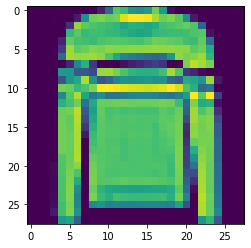

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_data[5]);

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

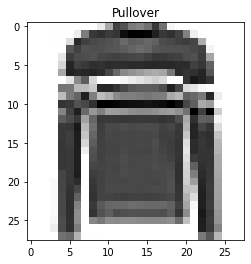

In [6]:
plt.imshow(train_data[5], cmap=plt.cm.binary)
plt.title(class_names[train_labels[5]]);

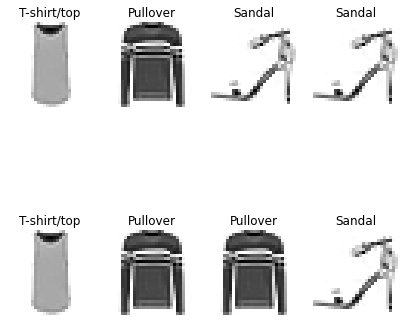

In [19]:
import random
random.seed(10)
plt.figure(figsize=(7, 7))

data = [5,8,2]
data_names = {5:'Sandal', 8:'Bag', 2:'Pullover'}

for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    rand_index = random.choice(data)
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [21]:
import numpy as np
x_train = train_data[np.where(np.in1d(train_labels, data))]
y_train = train_labels[np.where(np.in1d(train_labels, data))]
x_test = test_data[np.where(np.in1d(test_labels, data))]
y_test = test_labels[np.where(np.in1d(test_labels, data))]

tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(x_train,
                                y_train,
                                epochs=10,
                                validation_data=(x_test, y_test))

Epoch 1/10
563/563 [==============================] - 1s 1ms/step - loss: 1.7072 - accuracy: 0.5643 - val_loss: 1.0980 - val_accuracy: 0.6513
Epoch 2/10
563/563 [==============================] - 1s 1ms/step - loss: 0.8803 - accuracy: 0.6525 - val_loss: 0.7380 - val_accuracy: 0.6523
Epoch 3/10
563/563 [==============================] - 1s 1ms/step - loss: 0.6426 - accuracy: 0.6563 - val_loss: 0.5998 - val_accuracy: 0.6570
Epoch 4/10
563/563 [==============================] - 1s 1ms/step - loss: 0.5605 - accuracy: 0.6601 - val_loss: 0.5541 - val_accuracy: 0.6620
Epoch 5/10
563/563 [==============================] - 1s 2ms/step - loss: 0.5285 - accuracy: 0.6676 - val_loss: 0.5330 - val_accuracy: 0.6640
Epoch 6/10
563/563 [==============================] - 1s 1ms/step - loss: 0.5119 - accuracy: 0.6666 - val_loss: 0.5249 - val_accuracy: 0.6587
Epoch 7/10
563/563 [==============================] - 0s 754us/step - loss: 0.5025 - accuracy: 0.6635 - val_loss: 0.5186 - val_accuracy: 0.6683
Epoc

In [22]:
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [23]:
x_train.min(), x_train.max()

(0, 255)

In [24]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

x_train_norm.min(), x_train_norm.max()

(0.0, 1.0)

In [25]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(x_train_norm,
                            y_train,
                            epochs=10,
                            validation_data=(x_test_norm, y_test))

Epoch 1/10
563/563 [==============================] - 1s 2ms/step - loss: 0.5312 - accuracy: 0.8410 - val_loss: 0.0934 - val_accuracy: 0.9800
Epoch 2/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0789 - accuracy: 0.9813 - val_loss: 0.0622 - val_accuracy: 0.9830
Epoch 3/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0571 - accuracy: 0.9851 - val_loss: 0.0544 - val_accuracy: 0.9850
Epoch 4/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0492 - accuracy: 0.9865 - val_loss: 0.0460 - val_accuracy: 0.9860
Epoch 5/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0433 - accuracy: 0.9873 - val_loss: 0.0458 - val_accuracy: 0.9873
Epoch 6/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0373 - accuracy: 0.9888 - val_loss: 0.0448 - val_accuracy: 0.9877
Epoch 7/10
563/563 [==============================] - 1s 2ms/step - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0408 - val_accuracy: 0.9877
Epoch 

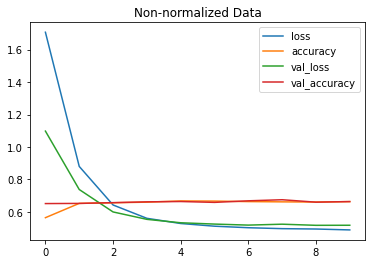

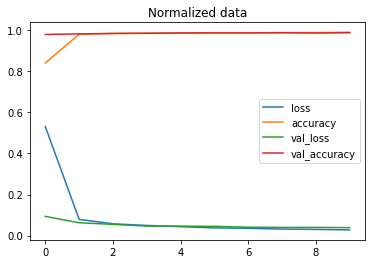

In [26]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")

pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [27]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(x_train_norm,
                               y_train,
                               epochs=20,
                               validation_data=(x_test_norm, y_test),
                               callbacks=[lr_scheduler])

Epoch 1/20
563/563 [==============================] - 2s 2ms/step - loss: 0.5312 - accuracy: 0.8410 - val_loss: 0.0934 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 2/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9814 - val_loss: 0.0611 - val_accuracy: 0.9830 - lr: 0.0011
Epoch 3/20
563/563 [==============================] - 1s 1ms/step - loss: 0.0564 - accuracy: 0.9854 - val_loss: 0.0530 - val_accuracy: 0.9837 - lr: 0.0013
Epoch 4/20
563/563 [==============================] - 1s 1ms/step - loss: 0.0480 - accuracy: 0.9862 - val_loss: 0.0452 - val_accuracy: 0.9877 - lr: 0.0014
Epoch 5/20
563/563 [==============================] - 1s 1ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0463 - val_accuracy: 0.9867 - lr: 0.0016
Epoch 6/20
563/563 [==============================] - 1s 991us/step - loss: 0.0360 - accuracy: 0.9889 - val_loss: 0.0448 - val_accuracy: 0.9880 - lr: 0.0018
Epoch 7/20
563/563 [==============================] - 0s 767us/step 

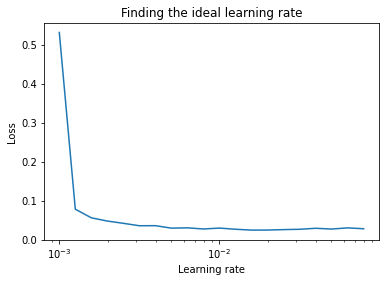

In [30]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(20)/10))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [36]:
find_lr_history_df = pd.DataFrame(find_lr_history.history)
optimal_lr = find_lr_history_df.loc[find_lr_history_df['loss'].idxmin()]['lr']

tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])


model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

history = model_14.fit(x_train_norm,
                        y_train,
                       epochs=20,
                       validation_data=(x_test_norm, y_test))

Epoch 1/20
563/563 [==============================] - 1s 1ms/step - loss: 0.5312 - accuracy: 0.8410 - val_loss: 0.0934 - val_accuracy: 0.9800
Epoch 2/20
563/563 [==============================] - 1s 1ms/step - loss: 0.0789 - accuracy: 0.9813 - val_loss: 0.0622 - val_accuracy: 0.9830
Epoch 3/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0571 - accuracy: 0.9851 - val_loss: 0.0544 - val_accuracy: 0.9850
Epoch 4/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9865 - val_loss: 0.0460 - val_accuracy: 0.9860
Epoch 5/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0433 - accuracy: 0.9873 - val_loss: 0.0458 - val_accuracy: 0.9873
Epoch 6/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0373 - accuracy: 0.9888 - val_loss: 0.0448 - val_accuracy: 0.9877
Epoch 7/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0408 - val_accuracy: 0.9877
Epoch 

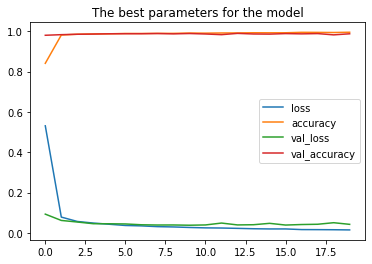

In [37]:
pd.DataFrame(history.history).plot(title="The best parameters for the model")
y_pred = model_14.predict(x_test_norm)

In [38]:
from sklearn.metrics import confusion_matrix

y_pred_res = []
for elem in y_pred: y_pred_res.append(elem.argmax())
confusion_matrix(y_test, y_pred_res)

array([[990,   1,   9],
       [  1, 995,   4],
       [ 12,  11, 977]])